In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from random import randint
import random

ROWS      = 5
COLUMNS   = 7
WALL_SIZE = 7
ACTIONS   = 4
STATES    = ROWS*COLUMNS 
NEXT_STATES = 4
γ         = 0.9  # γάμμα

# This is my world
M =([0,  0,  0, 0, 0,  0, 0],
    [0,  1, -1, 0, 0,  0, 0],
    [0, -1, -1, 0, 0,  0, 0],
    [0,  0, -1, 0, 0, -1, 0],
    [0,  0,  0, 0, 1, -1, 2])

# Actions
A=["E", "W", "N","S"] # East, West, North, South

# States
S = ((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6),
     (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6),
     (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6),
     (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6),
     (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6),
     )

# Start and Goal
starting_state = S[8]
goal_state     = S[34]

# Wall 
W=((1, 2), (2, 1), (2, 2), (2, 1), (3, 2), (3, 5), (4, 5))

In [84]:
def ConvertIndexToTuple(state):
    return(tuple(int(x) for x in np.base_repr(state, 7, 1)[-2::]))

def ConvertTupleToIndex(state):
    return(int("".join(str(x) for x in state), 7))

def getNextState(state, action):
    # Check if we reached goal state
    if state == goal_state:
        return state
    
    if action == "E":
        next_state_index=ConvertTupleToIndex(state)+1
    elif action == "W":
        next_state_index=ConvertTupleToIndex(state)-1 
    elif action == "N":
        next_state_index=ConvertTupleToIndex(state)-COLUMNS
    elif action == "S":
        next_state_index=ConvertTupleToIndex(state)+COLUMNS 
             
    # Check if next state hits the wall.
    for i in range(0,WALL_SIZE):
        if next_state_index == ConvertTupleToIndex(W[i]):
            return state
            
    # Check if next state is within Maze.
    if next_state_index >=0 and next_state_index <=34:
        next_state=ConvertIndexToTuple(next_state_index)
        return next_state
    else:
        return state  
    
def getPossibleStates(state, action):
    next_states = [0 for x in range(NEXT_STATES)]
    next_states_index = [0 for x in range(NEXT_STATES)]
    
    for i in range(NEXT_STATES):
        next_states[i]=state
    
    # Check if we reached goal state
    if state == goal_state:
        return next_states
    
    next_states_index[0]=ConvertTupleToIndex(state)+1 # E
    next_states_index[1]=ConvertTupleToIndex(state)-1 # W
    next_states_index[2]=ConvertTupleToIndex(state)-COLUMNS # N
    next_states_index[3]=ConvertTupleToIndex(state)+COLUMNS # S
             
    # Check if next state hits the wall.
    for i in range(0,NEXT_STATES):
        for j in range(0,WALL_SIZE):
            if next_states_index[i] == ConvertTupleToIndex(W[j]):
                next_states_index[i]=ConvertTupleToIndex(state)

        # Check if next state is within Maze.
        if next_states_index[i] <0 or next_states_index[i] >34:
            next_states_index[i]=ConvertTupleToIndex(state)

        next_states[i]=ConvertIndexToTuple(next_states_index[i])
 
    return next_states
def AllStatesTransition(current_state, action):
    next_states_probability = [0 for x in range(NEXT_STATES)]
    
    for i in range(0,NEXT_STATES):
        next_states_probability[i]=0
    
    if action == "E":
        next_states_probability[0] = 0.7
    elif action == "W":
        next_states_probability[1] = 0.7
    elif action == "N":
        next_states_probability[2] = 0.7
    elif action == "S":
        next_states_probability[3] = 0.7 
    
    for i in range(0,NEXT_STATES):
        if next_states_probability[i]==0:
            next_states_probability[i]=0.1
    return next_states_probability        

def getReward( action, next_states):
    next_states_reward = [0 for x in range(NEXT_STATES)]
    
    for i in range(0,NEXT_STATES):
        if next_states[i] == goal_state:
            next_states_reward[i]=10
        else:
            next_states_reward[i]=0
    return next_states_reward  

def getSingleStateReward( action, next_state):
    next_state_reward =0
    
    if next_state == goal_state:
        next_state_reward=10
    else:
        next_state_reward=0

    return next_state_reward   

def StateTransition(current_state, action, next_state):
    #next_state = getNextState( current_state, action) 
    if current_state == next_state:
        return 1
    else:
        return 0.7

# Might need it.
def weighted_choice(weights):
    totals = []
    running_total = 0

    for w in weights:
        running_total += w
        totals.append(running_total)

    rnd = random.random() * running_total
    for i, total in enumerate(totals):
        if rnd < total:
            return i     

In [203]:
# Policy Evaluation Algo
def PolicyEvaluation(P,R,V,π,γ):
    Δ=0
    θ=2
    while Δ<θ:
        for s in range (0, STATES):
            v=V[s]
            for a in range (0, ACTIONS):
                for n in range (0, NEXT_STATES):
                    V[s]+=π[s][a]*P[s][a][n] * (R[s][a][n]+ γ*V[n])
                    Δ=max(Δ, abs(v-V[s]))
        return V
    
# Policy Iteration Algo
def PolicyImprovement(P,R,V,π,γ):
    policy_stable=True
    for s in range (0, STATES):
        for a in range (0, ACTIONS):
            b=π[s][a]
            temp=[0 for x in range(NEXT_STATES)]
            for n in range (0, NEXT_STATES):
                temp[n]+=P[s][a][n] * (R[s][a][n]+ γ*V[n])
                #np.argmax()
            max_index_action= np.argmax(temp)      
            π[s][a]= temp[max_index_action]
            if b!=π[s][a]:
                policy_stable=False
    return policy_stable

In [45]:
# Define P and R and N matrices.

R = [[[0 for z in range(NEXT_STATES)] for x in range(ACTIONS)] for y in range(STATES)]  # Reward
N = [[[0 for z in range(NEXT_STATES)] for x in range(ACTIONS)] for y in range(STATES)]  # Next State
P = [[[0 for z in range(NEXT_STATES)] for x in range(ACTIONS)] for y in range(STATES)]  # Probabilty_new

# Initialize P, R and N
for i in range (0, STATES):
    for j in range (0, ACTIONS):
        current_state = S[i]
        action = A[j]
        next_states = getPossibleStates(current_state, action)
        N[i][j] = next_states
        P[i][j] = AllStatesTransition(current_state, action)
        R[i][j] = getReward( action, next_states)


In [210]:
# Initialize V(s)=0 and Q
V = [0 for x in range(STATES)] 
Q = [[0 for x in range(ACTIONS)] for y in range(STATES)] 

# Initialize π(s,α)=0.25
π = [[0.25 for x in range(ACTIONS)] for y in range(STATES)]  

# change gamma
γ=0.7

stability=True
total_reward_vf=0

V=PolicyEvaluation(P,R,V,π,γ)
stability=PolicyImprovement(P,R,V,π,γ)
print(γ,π, "\n\n", V,"\n", stability,"\n")

# for i in range (0,10):
#     V=PolicyEvaluation(P,R,V,π,γ)
#     stability=PolicyImprovement(P,R,V,π,γ)
    
# Policy Iteration Algo
while stability == False:
    V=PolicyEvaluation(P,R,V,π,γ)
    stability=PolicyImprovement(P,R,V,π,γ)
    print(γ,π, "\n\n", V,"\n", stability,"\n")
    

print(γ,π, "\n\n", V,"\n")
V

0.7 [[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 7.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [7.0, 1.0, 1.0, 1.0], [7.0, 7.0, 7.0, 7.0]] 

 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5, 10.0] 
 False 

0.7 [[0.0, 0.0, 0.0, 0.0], [0.0, 0.

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 54.49999999999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 54.49999999999999,
 290.0]

In [199]:
# ε-greedy selection
def selectActionGreedy(AS, AS_ind,Q, s_ind, step):   
    
    if step <= STEPS_GR:
        max_ind=np.argmax(Q[s_ind])
        AS[s_ind]=A[max_ind] 
        AS_ind[s_ind]=max_ind
    else:
        AS_ind[s_ind]=randint(0,3)
        AS[s_ind]=A[AS_ind[s_ind]]

    return AS[s_ind]  

In [202]:
# ε-greedy params
ε=0.1
STATES_GR = int (STATES *(1-ε))
STATES_RAND=STATES-STATES_GR

STEPS=100
STEPS_GR = int (STEPS *(1-ε))
STEPS_RAND=STEPS-STEPS_GR
    
# Initialize Q(s,a)=0
Q = [[0 for x in range(ACTIONS)] for y in range(STATES)] 

#Learning rate
α=0.4

# Initialize array to hold the selected actions
AS = [0 for x in range(STATES)]
AS_ind = [0 for x in range(STATES)]

total_reward=0  # Total reward initialization

# Q-learning Algorithm
for ep in range (0, 100):
    s=starting_state
    for step in range (0, STEPS):
        s_ind=ConvertTupleToIndex(s)
        a=selectActionGreedy(AS, AS_ind, Q, s_ind,step)
        s_n=getNextState(s,a)
        s_n_ind=ConvertTupleToIndex(s_n)
        r=getSingleStateReward(a,s_n)
        Q[s_ind][AS_ind[s_ind]]+=α*(r+γ*max(Q[s_n_ind])-Q[s_ind][AS_ind[s_ind]])
        s=s_n
        total_reward+=r # Accumulate Reward
    if s==goal_state:
        break   

print(s, ep, Q)  
print(total_reward)  

(4, 6) 15 [[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0, 0.0, 0, 0], [0, 0.0, 0.0, 0], [0, 0.0, 0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0, 0, 0, 0], [0.0, 0, 0, 0], [0, 0, 0, 0.0], [0, 0, 0, 0], [0, 0, 0, 0.0], [0.0, 0.0, 0.0, 0.0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0.0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0], [0, 0, 0.0, 0.0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 4.0], [0, 0.0, 0, 0], [0.0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
10


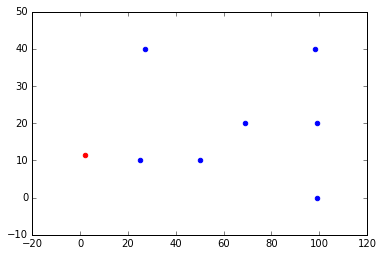

In [209]:
def plot_result(X1,X2,Y1,Y2):
    _ = plt.scatter(x=X1, y=X2, color='b')
    _ = plt.scatter(x=Y1, y=Y2, color='r')
    
X1=[69, 98, 25, 99, 99, 50, 27]
X2=[20, 40, 10,  0, 20, 10, 40]
Y1=[2]
Y2=[400/35]
plot_result(X1,X2,Y1,Y2)
  